## Lecture 16: Convolution Networks Example 
CS 109B, STAT 121B, AC 209B, CSE 109B

Pavlos Protopapas and Mark Glickman 

Content adapted from https://github.com/adventuresinML/adventures-in-ml-code/blob/master/keras_cnn.py

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Step 0: Preprocess data

These two lines of code will download and read in the data from the [MNIST dataset of handwritten digits](http://yann.lecun.com/exdb/mnist/) automatically

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The `mnist` variable contains a TensorFlow high level `Datasets` object, handling all the operations we'll perform on the data (labeling images, counting iterations during training, etc).

The MNIST data is split into three parts: 55,000 data points of training data (`mnist.train`), 10,000 points of test data (`mnist.test`), and 5,000 points of validation data (`mnist.validation`). This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes.

Each MNIST data point has two parts: an image of a handwritten digit and a corresponding label. Both the training set and test set contain images and their corresponding labels; for example the training images are `mnist.train.images` and the training labels are `mnist.train.labels`. 

The images are grayscale and can be seen as arrays of numbers (pixels), with values ranging from 0 (black) to 1 (white).

In [3]:
format_string = 'There are %d images and (of course) %d labels in the %s set'

print(format_string % (len(mnist.train.images), len(mnist.train.labels), 'training'))
print(format_string % (len(mnist.test.images), len(mnist.test.labels), 'test'))
print(format_string % (len(mnist.validation.images), len(mnist.validation.labels), 'validation'))

There are 55000 images and (of course) 55000 labels in the training set
There are 10000 images and (of course) 10000 labels in the test set
There are 5000 images and (of course) 5000 labels in the validation set


In [30]:
print mnist.train.images.shape

(55000, 784)


Each image is flattened into a 784-length vector. Reshape each image to 28 pixels by 28 pixels. We will get a 3D tensor.

In [46]:
x_train = mnist.train.images.reshape((len(mnist.train.images), 28, 28, 1))
x_test = mnist.test.images.reshape((len(mnist.test.images), 28, 28, 1))

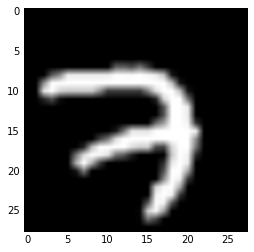

In [49]:
plt.imshow(x_train[0,:,:,0], cmap='gray')

Let's check the image is actually labeled correctly. As we specified before, the labels are encoded as [one-hot](https://en.wikipedia.org/wiki/One-hot)

In [42]:
num_classes = mnist.train.labels.shape[1]
print('Number of classes: ' + str(num_classes))

Number of classes: 10


In [38]:
one_hot_label = mnist.train.labels[0]
label = np.where(one_hot_label==1.)[0]
print('The label is %s, which is the one-hot encoding for %d' % (one_hot_label, label))

The label is [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.], which is the one-hot encoding for 7


In [41]:
y_train = mnist.train.labels
y_test = mnist.test.labels

## Step 1: Build convolutional network

In [43]:
model = Sequential()

# Layer 1: 32 convolution filters, with kernel size 5 x 5 
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),\
                 activation='relu',\
                 input_shape=(28, 28, 1)))

# Layer 2: Max pooling of outputs from 32 filter, 
#        applied to regions of size 2x2, 
#        shifting by 2 pixels in both dimensions
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 3: 64 convolution filters, with kernel size 5 x 5 
#        (by default stride is (1,1) for convolution)
model.add(Conv2D(64, (5, 5), activation='relu'))

# Layer 4: Max pooling of outputs from 64 filter, 
#        applied to regions of size 2x2, 
#        shifting by 2 pixels in both dimensions
#        (by default stride is same as pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Flatten pooled outputs into a 1D vector 
model.add(Flatten())

# Layer 6: Fully-connected layer with 1000 nodes
model.add(Dense(1000, activation='relu'))

# Layer 7: Softmax output: 10 categories
model.add(Dense(num_classes, activation='softmax'))

## Step 2: Choose Loss Function, Optimizer

In [44]:
# Our loss function is the cross-entropy, optimize using SGD
model.compile(loss=keras.losses.categorical_crossentropy,\
              optimizer=keras.optimizers.SGD(lr=0.01),\
              metrics=['accuracy'])

## Step 3: Optmization

In [51]:
# Run SGD with minibatch size of 128, with 10 epochs
result = model.fit(x_train, y_train,\
          batch_size=128,\
          epochs=10,\
          verbose=1,\
          validation_data=(x_test, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 76s 1ms/step - loss: 0.2181 - acc: 0.9353 - val_loss: 0.1708 - val_acc: 0.9487
Epoch 2/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.1661 - acc: 0.9510 - val_loss: 0.1300 - val_acc: 0.9616
Epoch 3/10
55000/55000 [==============================] - 75s 1ms/step - loss: 0.1351 - acc: 0.9602 - val_loss: 0.1041 - val_acc: 0.9703
Epoch 4/10
55000/55000 [==============================] - 77s 1ms/step - loss: 0.1143 - acc: 0.9661 - val_loss: 0.0936 - val_acc: 0.9743
Epoch 5/10
55000/55000 [==============================] - 75s 1ms/step - loss: 0.1003 - acc: 0.9706 - val_loss: 0.0819 - val_acc: 0.9762
Epoch 6/10
55000/55000 [==============================] - 75s 1ms/step - loss: 0.0903 - acc: 0.9726 - val_loss: 0.0741 - val_acc: 0.9779
Epoch 7/10
55000/55000 [==============================] - 78s 1ms/step - loss: 0.0821 - acc: 0.9757 - val_loss: 0.0765 - val_acc

## Step 4: Evaluate Performance

We should now finally evaluate the performance of our model.

('Test loss:', 0.079412530808709567)
('Test accuracy:', 0.97570000000000001)


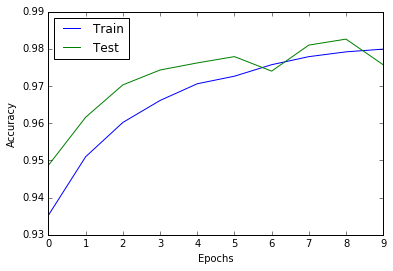

In [57]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(result.history['acc'], label='Train')
plt.plot(result.history['val_acc'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

## Step 5: Visualization

View output of each layer

In [117]:
# Code from: https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

from keras import backend as K

def get_layer_outputs(model, test_image):
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        #print(layer_output[0][0].shape)
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(model, test_image, layer_number, title_str):    
    layer_outputs = get_layer_outputs(model, test_image)

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]

    num_rows= np.round(n/16)
    fig, axes = plt.subplots(num_rows, 16, figsize=(16, num_rows))
    fig.subplots_adjust(hspace=1, wspace=0.3)

    for i, axis in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i < n:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = L[i]

            # Set the label for the sub-plot.
            axis.set_xlabel("Filter: {0}".format(i))

            # Plot the image.
            axis.imshow(image, cmap='gray')

        # Remove ticks from each sub-plot.
        axis.set_xticks([])
        axis.set_yticks([])
        
    plt.suptitle('Layer ' + str(layer_number) + ': ' +\
                 title_str + ' with output size ' + str(x_max) + ' x ' + str(y_max))

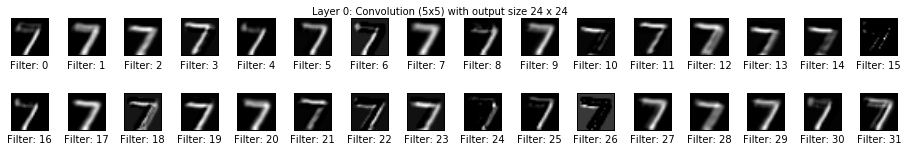

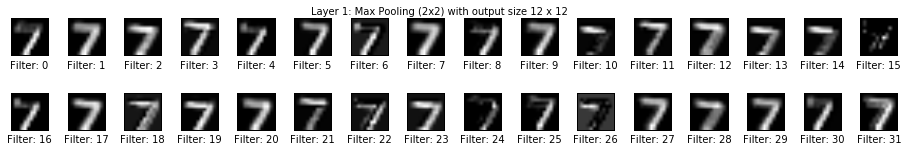

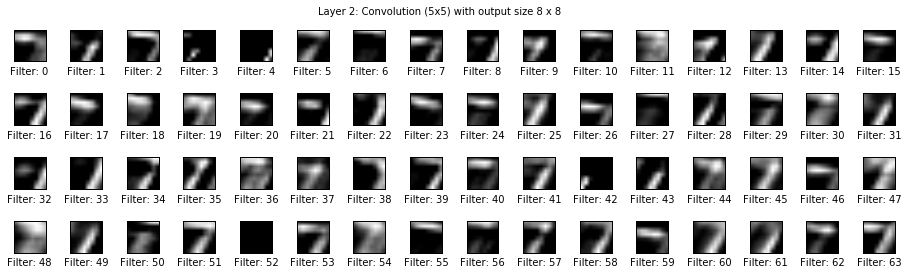

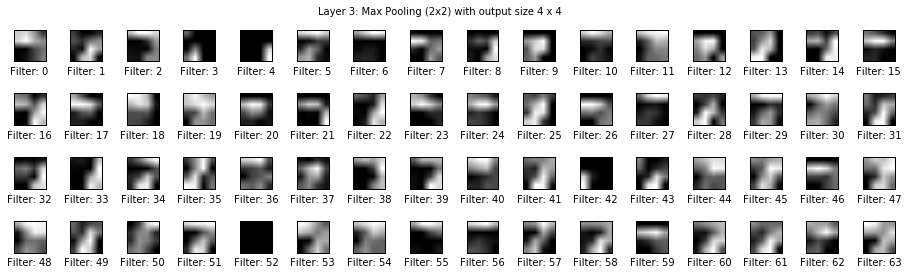

In [119]:
# Choose an image in test set
img_ind = 0

# Plot output of first 4 layers 
plot_layer_outputs(model, x_test[img_ind,:,:,:].reshape(1,28,28,1), 0, 'Convolution (5x5)')
plot_layer_outputs(model, x_test[img_ind,:,:,:].reshape(1,28,28,1), 1, 'Max Pooling (2x2)')
plot_layer_outputs(model, x_test[img_ind,:,:,:].reshape(1,28,28,1), 2, 'Convolution (5x5)')
plot_layer_outputs(model, x_test[img_ind,:,:,:].reshape(1,28,28,1), 3, 'Max Pooling (2x2)')